In [106]:
import pandas as pd

data= pd.read_csv(r'D:\Data Science\Project1\First\Dataset\StudentsPerformance.csv')
data.info()

# cat = data.select_dtypes(include = ['object']).columns
# for i in cat:
#     print(i, data[i].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [107]:
cat = ['gender', 'lunch', 'race/ethnicity', 'test preparation course']

dum = pd.get_dummies(data[cat], drop_first =True)
data = data.drop(cat, axis =1)
data = pd.concat([data,dum], axis=1)

val = {
    'some high school': 0,
    'high school': 1,
    'some college': 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
data['parental level of education'] = data['parental level of education'].map(val)

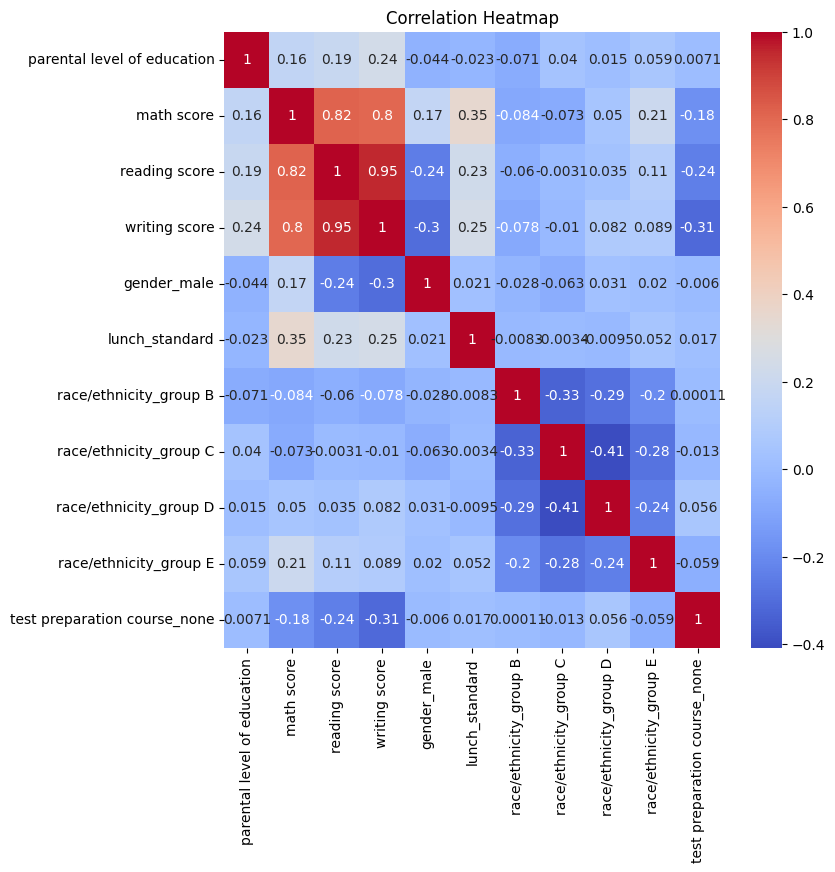

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = data.corr(numeric_only=True)

# Visualize
plt.figure(figsize=[8,8])
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [109]:
data.info()
data.isnull().sum()
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   parental level of education   1000 non-null   int64
 1   math score                    1000 non-null   int64
 2   reading score                 1000 non-null   int64
 3   writing score                 1000 non-null   int64
 4   gender_male                   1000 non-null   bool 
 5   lunch_standard                1000 non-null   bool 
 6   race/ethnicity_group B        1000 non-null   bool 
 7   race/ethnicity_group C        1000 non-null   bool 
 8   race/ethnicity_group D        1000 non-null   bool 
 9   race/ethnicity_group E        1000 non-null   bool 
 10  test preparation course_none  1000 non-null   bool 
dtypes: bool(7), int64(4)
memory usage: 38.2 KB


np.int64(0)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

val = ['math score','reading score','writing score']
model = LinearRegression()

for i in val:
    val1 = [j for j in val if j != i]
    x = data[['parental level of education','gender_male','lunch_standard'] + val1]
    y=data[[i]]

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    print(i,"R2_score",r2_score(y_test,y_pred))
    print(i,"MEAN SQUARED ERROR",mean_squared_error(y_test,y_pred))
    print(i,"MAE:", mean_absolute_error(y_test, y_pred))



math score R2_score 0.8664659576782825
math score MEAN SQUARED ERROR 32.49396020409902
math score MAE: 4.520863122566144
reading score R2_score 0.9118225812906215
reading score MEAN SQUARED ERROR 19.953172081765018
reading score MAE: 3.601161673028299
writing score R2_score 0.9191393878623512
writing score MEAN SQUARED ERROR 19.4887801340644
writing score MAE: 3.6334254878344256


In [ ]:
# from sklearn.model_selection import train_test_split
#
# x = data[['parental level of education','gender_male','lunch_standard','math score','reading score']]
# y = data[['writing score']]
#
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# from sklearn.linear_model import LinearRegression
#
# model = LinearRegression()
# model.fit(x_train,y_train)
# y_pred = model.predict(x_test)

In [ ]:
# from sklearn.metrics import r2_score, mean_squared_error
#
# print(r2_score(y_test,y_pred))
# print(mean_squared_error(y_test,y_pred))